<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Sales                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

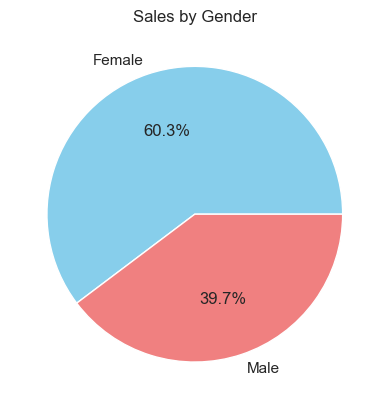

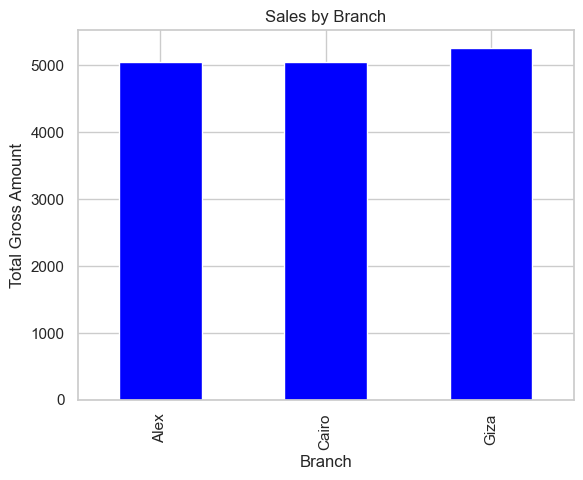

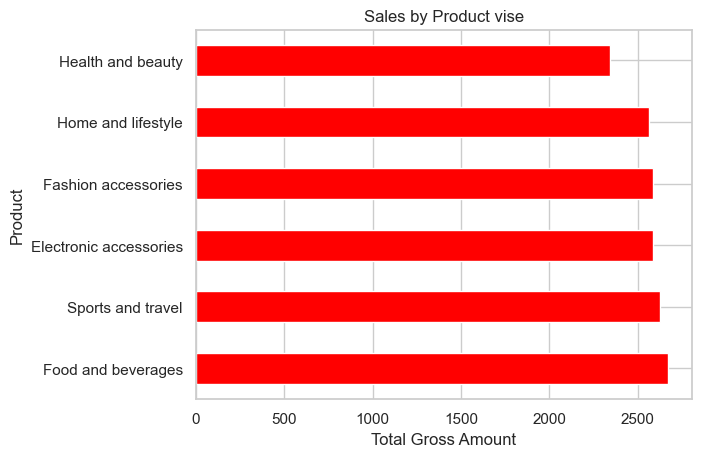

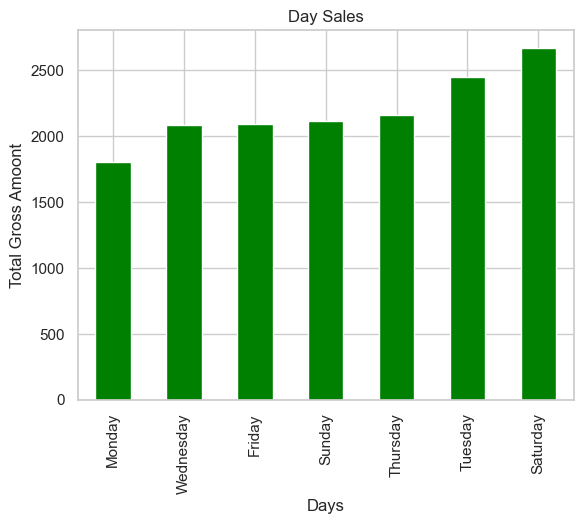

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = "whitegrid") # charts look nicer

data = pd.read_csv("SuperMarket Analysis.csv") # read the csv
data.head() # show the first few rows
data.isnull().sum  #check if any column has missing data

data.info() # quick info like count of rows and columns
data.describe() #quick statistics like average, mean, std, max, min 

data['Branch'].unique() # Branch names
data.groupby('Branch')['gross income'].sum()#  gross income made by branchs
data.groupby('City')['gross income'].sum() # gross income by city
data.groupby('Gender')['gross income'].sum() # gross income by gender
data.groupby('Customer type')['gross income'].sum() # gross income by customer type
data.groupby('Product line')['gross income'].sum().sort_values(ascending=False) # gross income by product lines max to min

# pie chart 
gender_sales = data.groupby('Gender')['gross income'].sum()
gender_sales.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'lightcoral'])
plt.title('Sales by Gender')
plt.ylabel('') # hide the y label
plt.show()

#Bar chart
branch_sales= data.groupby('Branch')['gross income'].sum()
branch_sales.plot(kind='bar', color = 'blue')
plt.title('Sales by Branch')
plt.xlabel('Branch')
plt.ylabel('Total Gross Amount')
plt.show()

# Horizontal bar graph
product_sales = data.groupby('Product line')['gross income'].sum().sort_values(ascending=False)
product_sales.plot(kind='barh' , color = 'red')
plt.title('Sales by Product vise')
plt.xlabel('Total Gross Amount')
plt.ylabel('Product')
plt.show()

# Sales of days versus
data['Date'] = pd.to_datetime(data['Date']) #convert date colum to proper format
data['Day']= data['Date'].dt.day_name() # create new colum for day names
day_sales= data.groupby('Day')['gross income'].sum().sort_values() # group by total sales
day_sales.plot(kind='bar', color = 'green')
plt.title('Total Day Sales')
plt.xlabel('Days')
plt.ylabel('Total Gross Amoont')
plt.show()